# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [2]:
# importar librerías
import pandas as pd

In [3]:
# leer conjuntos de datos en los DataFrames

inst_order = pd.read_csv("instacart_orders.csv", sep= ";")
products = pd.read_csv("products.csv", sep= ";")
aisles = pd.read_csv("aisles.csv", sep= ";")
depts = pd.read_csv("departments.csv", sep= ";")
ord_prod = pd.read_csv("order_products.csv", sep= ";")

In [4]:
# mostrar información del DataFrame
#data = [inst_order,product,aisles,depts,ord_prod]

inst_order.info()
print()
inst_order.head()

#dartos perdidos en col 5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB



,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [5]:
# mostrar información del DataFrame
products.info()
print()
products.head()

#datos perdidos en col 1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB



,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
# mostrar información del DataFrame
aisles.info()
print()
aisles.head()

#no datos perdidos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB



,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
# mostrar información del DataFrame
depts.info()
print()
depts.head()

#no perdidos :D 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes



,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
# mostrar información del DataFrame
ord_prod.info()
print()
ord_prod.head()
print()
print(ord_prod.isna().sum())

#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


## Conclusiones


hay valores perdidos en: 
- la lista de ordenes, en la columna de días desde la orden
- la lista de productos, en el nombre del producto

en la lista de productos podemos a priori prescindir de esa info. 
mientras que los días desde la orden, habría que investigar a que se debe, sin embargo puede establecerse un valor arbitrario, un promedio, o simplemente descartar esas ordenes. 

La en la ultima tabla no se muestran los valores no nulos, habra que hacer una investigacion manual de ello.

# Paso 2. Preprocesamiento de los datos


Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `instacart_orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
print(inst_order.duplicated().sum())
print()
print(inst_order[inst_order.duplicated()].sort_values(by="user_id"))

order_dp = inst_order[inst_order.duplicated()]["order_id"]
#print(order_dp)

15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
441599   2125197    14050            48          3                  2   
284038   2845099    31189            11          3                  2   
145574    794638    50898            24          3                  2   
311713   1021560    53767             3          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
321100    408114    68324             4          3                  2   
345917   2232988    82565             1          3                  2   
415163   2282673    86751            49          3                  2   
266232   1782114   106752             1          3                  2   
223105   2160484   107525            16          3                  2   
411408   1286742   183220            48          3                  2   
230807   1918001   188546            14        

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [10]:
# Basándote en tus hallazgos,
"""Una revision detallada revela que existen 15 duplicados dentro del df por lo que lo ideal es eliminarlos ya que son los mismos pedidos con indices distintos """
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
inst_order[(inst_order["order_dow"]== 3 ) & (inst_order["order_hour_of_day"] == 2)]
#inst_order[(inst_order["order_dow"]== 3 ) & (inst_order["order_hour_of_day"] == 2)].query("order_id in @order_dp")

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


¿Qué sugiere este resultado?

In [11]:
# Elimina los pedidos duplicados
inst_order.drop_duplicates(inplace=True)

In [12]:
# Vuelve a verificar si hay filas duplicadas
print(inst_order.duplicated().sum())


0


In [13]:
# Vuelve a verificar si hay IDs duplicados de pedidos
inst_order[inst_order.duplicated()]["order_id"]

Series([], Name: order_id, dtype: int64)

Describe brevemente tus hallazgos y lo que hiciste con ellos

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())


0


In [15]:
# Verifica si hay IDs duplicadas de productos
products["product_id"].duplicated().sum()

0

In [16]:
# Revisa si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products["product_name"].str.upper().duplicated().sum()

1361

In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
products[~products["product_name"].isna()]["product_name"].str.upper().duplicated().sum()


#products[products[~products["product_name"].isna()]["product_name"].str.upper().duplicated()]



104

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print(depts.duplicated().sum())




0


In [19]:
# Revisa si hay IDs duplicadas de productos
depts["department_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())


0


In [21]:
# Revisa si hay IDs duplicadas de productos
aisles["aisle_id"].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print(ord_prod.duplicated().sum())

0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(ord_prod["order_id"].duplicated().sum())
#print(ord_prod[ord_prod["order_id"].duplicated()])

print(ord_prod["product_id"].duplicated().sum())
#print(ord_prod[ord_prod["product_id"].duplicated()])

4094961
4499434


Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
products[products["product_name"].isna()]


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[products["product_name"].isna()]["aisle_id"].nunique()
#Si todos son pasillo 100



1

Describe brevemente cuáles son tus hallazgos.

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[products["product_name"].isna()]["department_id"].nunique()

#Ídem, todo esta relacionado con el depto 21

1

Describe brevemente cuáles son tus hallazgos.

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles.query("aisle_id == 10"))
print()
print(depts.query("department_id == 21"))

   aisle_id             aisle
9        10  kitchen supplies

    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"].fillna("Unknown", inplace=True)
products[products["product_name"].isna()]


,product_id,product_name,aisle_id,department_id


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `orders` data frame

In [29]:
# Encuentra los valores ausentes
inst_order.isna().sum()


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


Describe brevemente tus hallazgos y lo que hiciste con ellos.

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
ord_prod.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("Min", ord_prod["add_to_cart_order"].min(),"Max",ord_prod["add_to_cart_order"].max())

Min 1.0 Max 64.0


Describe brevemente cuáles son tus hallazgos.

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
orden_NA = ord_prod[ord_prod["add_to_cart_order"].isna()]
print(orden_NA)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
orden_NA.groupby("order_id")["product_id"].count()

order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Name: product_id, Length: 70, dtype: int64

Describe brevemente cuáles son tus hallazgos.

In [35]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.

ord_prod.fillna({"add_to_cart_order": 999}, inplace=True)

ord_prod["add_to_cart_order"] = ord_prod["add_to_cart_order"].astype("int")
ord_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int32
 3   reordered          int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [36]:
print(inst_order.iloc[:,3:5].describe())

           order_dow  order_hour_of_day
count  478952.000000      478952.000000
mean        2.775051          13.447034
std         2.045901           4.224567
min         0.000000           0.000000
25%         1.000000          10.000000
50%         3.000000          13.000000
75%         5.000000          16.000000
max         6.000000          23.000000


<Axes: title={'center': 'Compras por día de la semana'}, xlabel='Dia de la semana (0 = domingo)', ylabel='Frecuencia'>

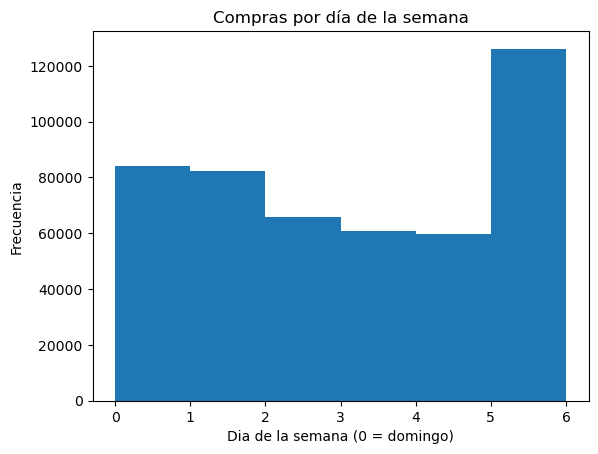

In [37]:
inst_order["order_dow"].plot(kind="hist",bins= 6, title= "Compras por día de la semana", ylabel="Frecuencia", xlabel="Dia de la semana (0 = domingo)")

Escribe aquí tus conclusiones

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

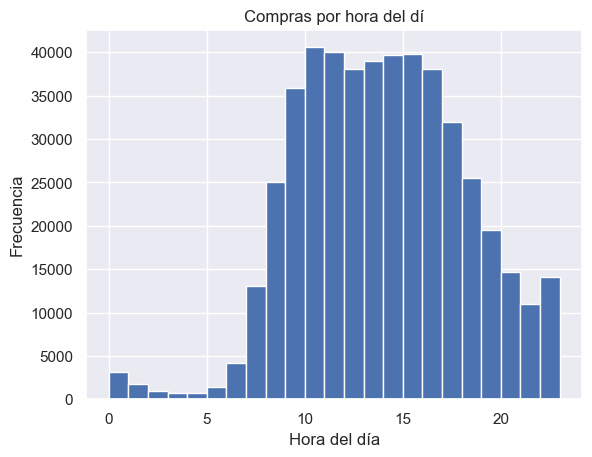

In [38]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.set()

inst_order["order_hour_of_day"].plot(kind="hist",bins= 23, title = "Compras por hora del dí", ylabel="Frecuencia", xlabel="Hora del día")
plt.show()


Escribe aquí tus conclusiones

### [A3] ¿Qué día de la semana compran víveres las personas?

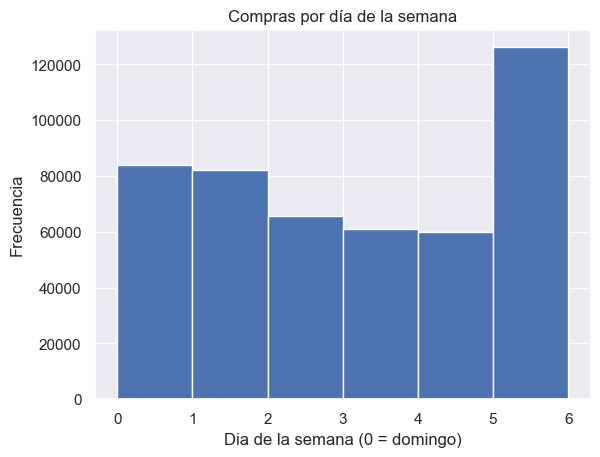

In [39]:
inst_order["order_dow"].plot(kind="hist", bins= 6, title= "Compras por día de la semana", ylabel="Frecuencia", xlabel="Dia de la semana (0 = domingo)")
plt.show()

Escribe aquí tus conclusiones

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

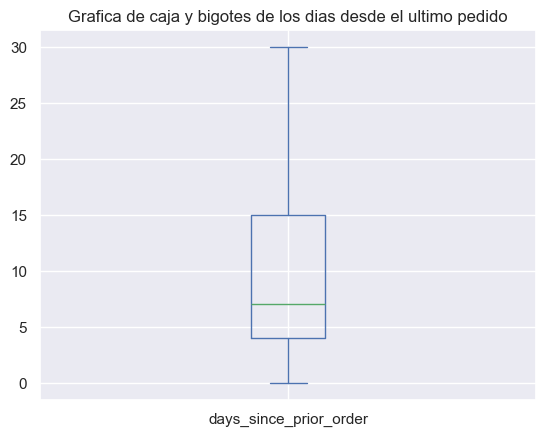

In [40]:
inst_order["days_since_prior_order"].plot(kind="box", title="Grafica de caja y bigotes de los dias desde el ultimo pedido")
plt.show()

Escribe aquí tus conclusiones

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [43]:
datitos = inst_order[(inst_order["order_dow"]== 3) | (inst_order["order_dow"]== 6)]

instacart_df = pd.DataFrame({
    'Miercoles': datitos[datitos["order_dow"]==3]["order_hour_of_day"].value_counts().sort_index(),
    'Sabado': datitos[datitos["order_dow"]==6]["order_hour_of_day"].value_counts().sort_index()
})

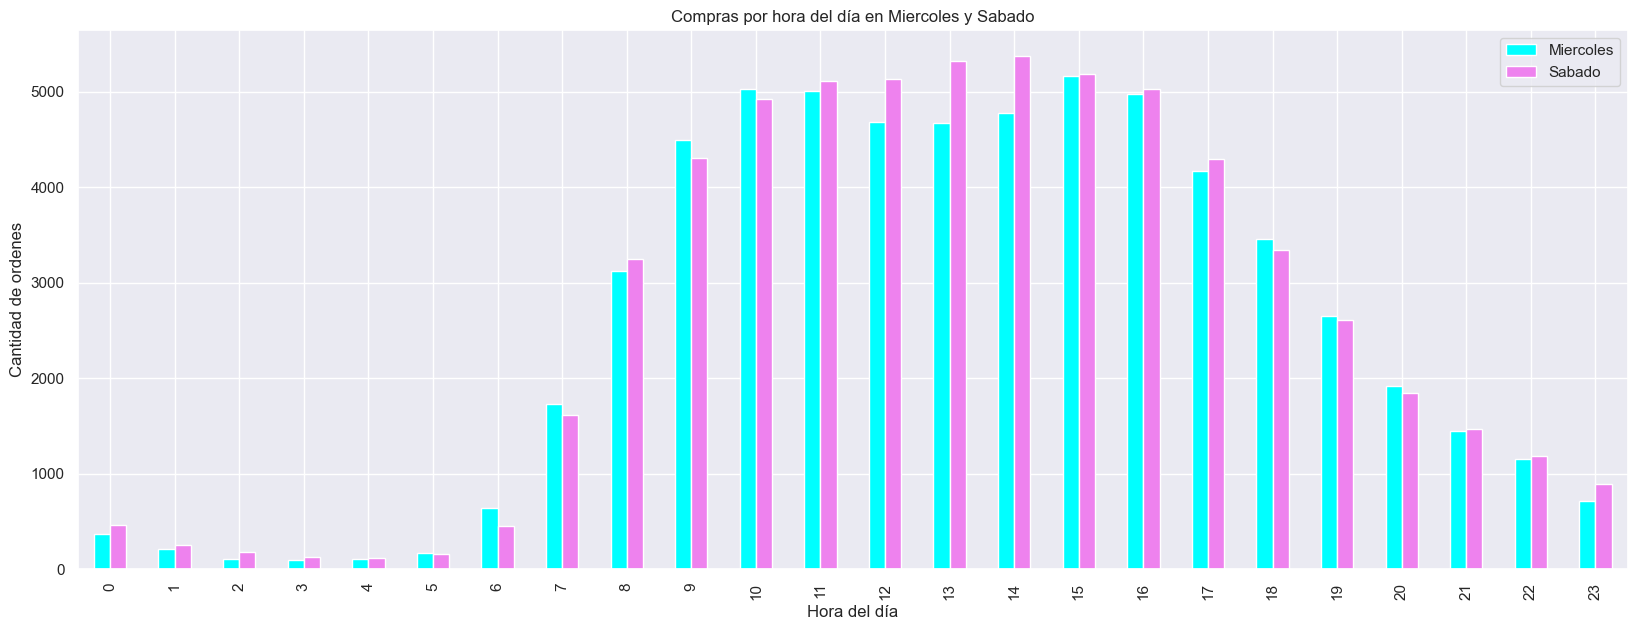

In [49]:
instacart_df.plot(kind="bar", color= ["cyan", "violet"], figsize=(20, 7), title= "Compras por hora del día en Miercoles y Sabado", xlabel="Hora del día", ylabel="Cantidad de ordenes")
plt.show()

Escribe aquí tus conclusiones

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

Escribe aquí tus conclusiones

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

Escribe aquí tus conclusiones

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

Escribe aquí tus conclusiones

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

Escribe aquí tus conclusiones

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

Escribe aquí tus conclusiones

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

Escribe aquí tus conclusiones

### Conclusion general del proyecto: